In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve

In [ ]:
#potential title: predicting disorders based on the correlation of eeg featues
# use methodology, results in report

In [3]:
# Load the dataset
data = pd.read_csv('C:/Users/bouad/OneDrive/Documents/EEG Psychiatric Disorders Dataset.csv', dtype={'column_name': 'object'})

# data cleaning

In [4]:
data.describe()

,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,945.000000,945.000000,930.000000,932.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.000000,30.594804,13.438710,101.580472,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,...,75.889633,55.049113,56.959796,60.739169,69.829254,47.862489,66.832798,39.301406,66.153213,57.056207
std,272.942302,11.781592,2.550461,17.022414,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,...,15.861641,19.541956,18.326785,18.052887,17.725321,19.685722,17.028701,20.790933,18.088548,19.600107
min,1.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,237.000000,21.730000,12.000000,91.000000,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,...,68.014443,41.607506,43.682444,48.374883,58.937785,32.581046,55.872070,22.049743,54.710605,43.955229
50%,473.000000,26.150000,13.000000,102.000000,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,...,78.647712,55.158858,56.657348,61.257972,72.298636,45.719426,68.238375,36.549938,67.988937,57.515871
75%,709.000000,35.450000,16.000000,114.000000,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,...,87.398387,69.740640,70.649245,73.979100,83.066877,62.081839,79.192418,54.169209,79.527764,71.626382
max,945.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


In [5]:
# Convert a column to float
data['main.disorder'] = data['main.disorder'].astype(str)

data['specific.disorder'] = data['specific.disorder'].astype(str)

data['sex'] = data['sex'].astype(str)


In [6]:
data.dtypes.head(20)


no.                    int64
sex                   object
age                  float64
eeg.date              object
education            float64
IQ                   float64
main.disorder         object
specific.disorder     object
AB.A.delta.a.FP1     float64
AB.A.delta.b.FP2     float64
AB.A.delta.c.F7      float64
AB.A.delta.d.F3      float64
AB.A.delta.e.Fz      float64
AB.A.delta.f.F4      float64
AB.A.delta.g.F8      float64
AB.A.delta.h.T3      float64
AB.A.delta.i.C3      float64
AB.A.delta.j.Cz      float64
AB.A.delta.k.C4      float64
AB.A.delta.l.T4      float64
dtype: object

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1149 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(4)
memory usage: 8.3+ MB


In [8]:
data.isnull().sum().head(50)

no.                   0
sex                   0
age                   0
eeg.date              0
education            15
IQ                   13
main.disorder         0
specific.disorder     0
AB.A.delta.a.FP1      0
AB.A.delta.b.FP2      0
AB.A.delta.c.F7       0
AB.A.delta.d.F3       0
AB.A.delta.e.Fz       0
AB.A.delta.f.F4       0
AB.A.delta.g.F8       0
AB.A.delta.h.T3       0
AB.A.delta.i.C3       0
AB.A.delta.j.Cz       0
AB.A.delta.k.C4       0
AB.A.delta.l.T4       0
AB.A.delta.m.T5       0
AB.A.delta.n.P3       0
AB.A.delta.o.Pz       0
AB.A.delta.p.P4       0
AB.A.delta.q.T6       0
AB.A.delta.r.O1       0
AB.A.delta.s.O2       0
AB.B.theta.a.FP1      0
AB.B.theta.b.FP2      0
AB.B.theta.c.F7       0
AB.B.theta.d.F3       0
AB.B.theta.e.Fz       0
AB.B.theta.f.F4       0
AB.B.theta.g.F8       0
AB.B.theta.h.T3       0
AB.B.theta.i.C3       0
AB.B.theta.j.Cz       0
AB.B.theta.k.C4       0
AB.B.theta.l.T4       0
AB.B.theta.m.T5       0
AB.B.theta.n.P3       0
AB.B.theta.o.Pz 

In [9]:
# Apply one-hot encoding only to the 'sex' column
encoded_columns = pd.get_dummies(data['sex'])

# Convert one-hot encoded columns to int (optional, as they should already be in 0/1 format)
encoded_columns = encoded_columns.astype(int)

# Concatenate the original data (excluding 'sex') with the encoded columns
encoded_data = pd.concat([data.drop('sex', axis=1), encoded_columns], axis=1)

print(encoded_data)

     no.   age    eeg.date  education     IQ       main.disorder  \
0      1  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1      2  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2      3  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3      4  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4      5  36.0  2012.10.18       16.0  112.0  Addictive disorder   
..   ...   ...         ...        ...    ...                 ...   
940  941  22.0   2014.8.28       13.0  116.0     Healthy control   
941  942  26.0   2014.9.19       13.0  118.0     Healthy control   
942  943  26.0   2014.9.27       16.0  113.0     Healthy control   
943  944  24.0   2014.9.20       13.0  107.0     Healthy control   
944  945  21.0  2015.10.23       13.0  105.0     Healthy control   

        specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  \
0    Alcohol use disorder         35.998557         21.717375   
1    Alcohol use disorder         13.425118         1

In [10]:
encoded_data = encoded_data.drop('eeg.date', axis=1)
print(encoded_data.isnull().sum())

no.                       0
age                       0
education                15
IQ                       13
main.disorder             0
                         ..
COH.F.gamma.q.T6.r.O1     0
COH.F.gamma.q.T6.s.O2     0
COH.F.gamma.r.O1.s.O2     0
F                         0
M                         0
Length: 1149, dtype: int64


In [11]:
# Drop rows where null values are in specific critical columns only
critical_columns = ['education', 'IQ']  # Example: replace with your actual critical columns
encoded_data = encoded_data.dropna(subset=critical_columns)


In [12]:
print(encoded_data.isnull().sum())

no.                      0
age                      0
education                0
IQ                       0
main.disorder            0
                        ..
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
F                        0
M                        0
Length: 1149, dtype: int64


In [13]:
duplicate_mask=encoded_data.duplicated()
print(duplicate_mask)
print(type(duplicate_mask))

1      False
2      False
3      False
4      False
5      False
       ...  
940    False
941    False
942    False
943    False
944    False
Length: 919, dtype: bool
<class 'pandas.core.series.Series'>


In [14]:
if duplicate_mask.any():
    print("Duplicate rows exist in the DataFrame")
else:
    print("No duplicate rows found in the DataFrame")
    

No duplicate rows found in the DataFrame


In [15]:
# Check for missing values in each column
missing_columns = encoded_data.columns[encoded_data.isnull().any()].tolist()

# Filter the DataFrame to show only the columns with missing values
missing_values_df = encoded_data[missing_columns]

# Display the columns with missing values and their corresponding counts of null values
missing_values_counts = missing_values_df.isnull().sum()
print("Columns with Missing Values:")
for col, count in missing_values_counts.items():
    print(f"{col}: {count} null values")

Columns with Missing Values:
Unnamed: 122: 919 null values


In [16]:
#  Remove the 'Unnamed: 122' column if it exists
try:
    df = encoded_data.drop(columns=['Unnamed: 122'])
    print("Column 'Unnamed: 122' removed successfully.")
except KeyError:
    print("Column 'Unnamed: 122' was not removed!.")


Column 'Unnamed: 122' removed successfully.


In [17]:
df.to_csv("./cleaned_data.csv", index=False)

In [18]:
df=pd.read_csv("cleaned_data.csv")
print(df)

     no.   age  education     IQ       main.disorder     specific.disorder  \
0      2  37.0        6.0  120.0  Addictive disorder  Alcohol use disorder   
1      3  32.0       16.0  113.0  Addictive disorder  Alcohol use disorder   
2      4  35.0       18.0  126.0  Addictive disorder  Alcohol use disorder   
3      5  36.0       16.0  112.0  Addictive disorder  Alcohol use disorder   
4      6  24.0       14.0  105.0  Addictive disorder  Alcohol use disorder   
..   ...   ...        ...    ...                 ...                   ...   
914  941  22.0       13.0  116.0     Healthy control       Healthy control   
915  942  26.0       13.0  118.0     Healthy control       Healthy control   
916  943  26.0       16.0  113.0     Healthy control       Healthy control   
917  944  24.0       13.0  107.0     Healthy control       Healthy control   
918  945  21.0       13.0  105.0     Healthy control       Healthy control   

     AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  AB.A.

# preprocessing Data

In [19]:
# Import necessary library for LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode 'main.disorder', 'specific.disorder', and 'sex' as numerical values
df['main.disorder'] = label_encoder.fit_transform(df['main.disorder'])
df['specific.disorder'] = label_encoder.fit_transform(df['specific.disorder'])



In [20]:
# Verify the encoding
# Print unique values to ensure they are numerical
print("Unique values in 'main.disorder':", df['main.disorder'].unique())
print("Unique values in 'specific.disorder':", df['specific.disorder'].unique())

Unique values in 'main.disorder': [0 6 3 2 4 5 1]
Unique values in 'specific.disorder': [ 2  0  5  6  3  7 10  8 11  9  1  4]


In [21]:
# Print the first few rows of the DataFrame to visually inspect the changes
print(df.head())
#print(df)

   no.   age  education     IQ  main.disorder  specific.disorder  \
0    2  37.0        6.0  120.0              0                  2   
1    3  32.0       16.0  113.0              0                  2   
2    4  35.0       18.0  126.0              0                  2   
3    5  36.0       16.0  112.0              0                  2   
4    6  24.0       14.0  105.0              0                  2   

   AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  AB.A.delta.d.F3  ...  \
0         13.425118         11.002916        11.942516        15.272216  ...   
1         29.941780         27.544684        17.150159        23.608960  ...   
2         21.496226         21.846832        17.364316        13.833701  ...   
3         37.775667         33.607679        21.865556        21.771413  ...   
4         13.482096         14.095855        12.854630        11.727480  ...   

   COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  \
0              26.777368            

In [22]:
# Step 5: Exclude non-numeric columns from the scaling process
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
numeric_df = df.drop(columns=non_numeric_cols)


In [23]:
# Import necessary library for MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Step 6: Scale the numerical features using MinMaxScaler
scaler = MinMaxScaler()
scaled_numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Combine scaled numeric data with non-numeric columns
df_scaled = pd.concat([scaled_numeric_df, df[non_numeric_cols].reset_index(drop=True)], axis=1)



In [24]:
print(df_scaled)

          no.       age  education        IQ  AB.A.delta.a.FP1  \
0    0.000000  0.352635       0.30  0.739583          0.113371   
1    0.001060  0.259837       0.80  0.666667          0.297804   
2    0.002121  0.315516       0.90  0.802083          0.203497   
3    0.003181  0.334076       0.80  0.656250          0.385281   
4    0.004242  0.111359       0.70  0.583333          0.114008   
..        ...       ...        ...       ...               ...   
914  0.995758  0.074239       0.65  0.697917          0.430797   
915  0.996819  0.148478       0.65  0.718750          0.175476   
916  0.997879  0.148478       0.80  0.666667          0.284846   
917  0.998940  0.111359       0.65  0.604167          0.185998   
918  1.000000  0.055679       0.65  0.583333          0.691461   

     AB.A.delta.b.FP2  AB.A.delta.c.F7  AB.A.delta.d.F3  AB.A.delta.e.Fz  \
0            0.078952         0.100676         0.149872         0.094145   
1            0.247279         0.159637         0.255225

In [ ]:
# Save the DataFrame to a different file
#df_scaled.to_csv("./preprocessed_data.csv", index=False)


In [35]:
df=pd.read_csv("preprocessed_data.csv")
print(df)

     no.   age  education     IQ  main.disorder  specific.disorder  \
0      2  37.0        6.0  120.0              0                  2   
1      3  32.0       16.0  113.0              0                  2   
2      4  35.0       18.0  126.0              0                  2   
3      5  36.0       16.0  112.0              0                  2   
4      6  24.0       14.0  105.0              0                  2   
..   ...   ...        ...    ...            ...                ...   
914  941  22.0       13.0  116.0              2                  6   
915  942  26.0       13.0  118.0              2                  6   
916  943  26.0       16.0  113.0              2                  6   
917  944  24.0       13.0  107.0              2                  6   
918  945  21.0       13.0  105.0              2                  6   

     AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  AB.A.delta.d.F3  \
0           13.425118         11.002916        11.942516        15.272216   
1    

In [36]:
# Compute the correlation matrix
corr = df.corr()

# Get correlations with the target variable
corr_target = corr['main.disorder'].abs().sort_values(ascending=False)

# Print the top features most correlated with the target variable
print("Top features correlated with 'main.disorder':")
print(corr_target.head(20))  # Display top 20 features for inspection


Top features correlated with 'main.disorder':
main.disorder        1.000000
M                    0.297205
F                    0.297205
no.                  0.259402
specific.disorder    0.238574
AB.D.beta.g.F8       0.176778
IQ                   0.171808
AB.D.beta.f.F4       0.164462
age                  0.164089
AB.D.beta.a.FP1      0.159694
AB.D.beta.k.C4       0.157455
AB.D.beta.j.Cz       0.153573
AB.D.beta.b.FP2      0.151332
AB.D.beta.e.Fz       0.150799
AB.D.beta.d.F3       0.150138
AB.D.beta.i.C3       0.147762
AB.A.delta.r.O1      0.145908
AB.A.delta.q.T6      0.142594
AB.D.beta.c.F7       0.142448
AB.D.beta.l.T4       0.141430
Name: main.disorder, dtype: float64


In [43]:
#model comparision
# thank you for hisham and ignacio for thei guidance and helpful insights

# Set a threshold for high correlation
threshold = 0.5  # Adjust this threshold as needed

# Filter correlations above the threshold
high_corr_features = corr_target[corr_target > threshold]

# Print the high correlation features
print("Features highly correlated with 'main.disorder':")
print(high_corr_features)


Features highly correlated with 'main.disorder':
main.disorder    1.0
Name: main.disorder, dtype: float64


In [66]:


# Compute the correlation matrix excluding the target variable
corr = df.drop(columns=['main.disorder']).corr()

# Set a threshold for high correlation
threshold = 0.8

# Find pairs of features with correlation higher than the threshold
high_corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr.columns[i], corr.columns[j]))

# Print the number of pairs of features with high correlation
print(f"Number of pairs of features with high correlation: {len(high_corr_pairs)}")


Number of pairs of features with high correlation: 9826


Top 5 pairs of features with high correlation:
M and F: -1.00
AB.C.alpha.b.FP2 and AB.C.alpha.a.FP1: 0.99
COH.C.alpha.f.F4.r.O1 and COH.C.alpha.e.Fz.r.O1: 0.99
AB.C.alpha.f.F4 and AB.C.alpha.e.Fz: 0.99
COH.C.alpha.b.FP2.s.O2 and COH.C.alpha.a.FP1.s.O2: 0.99


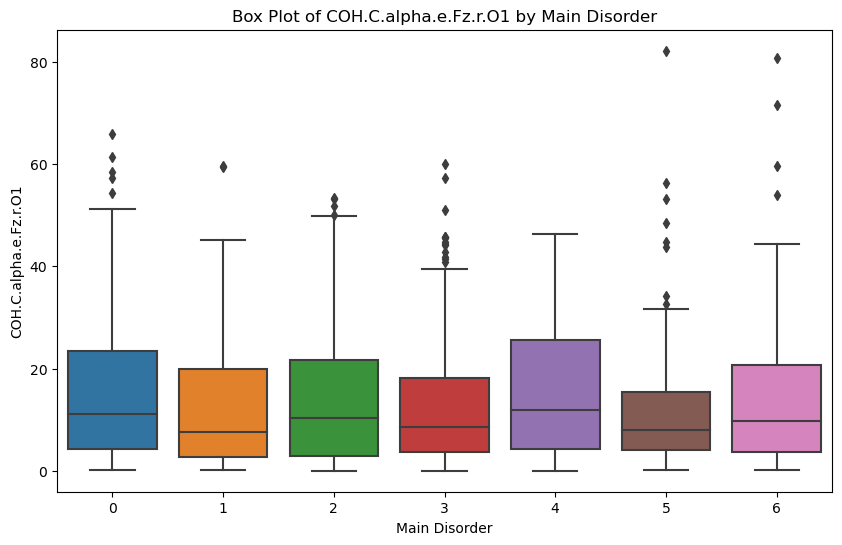

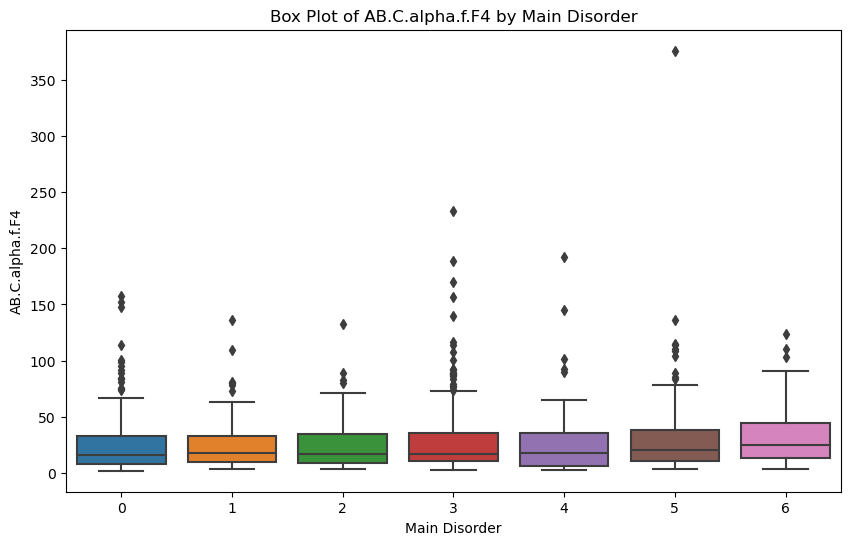

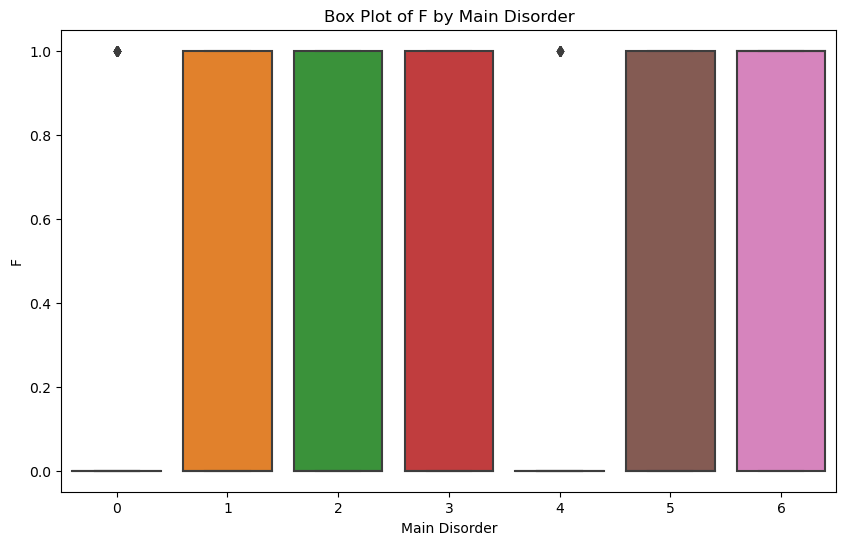

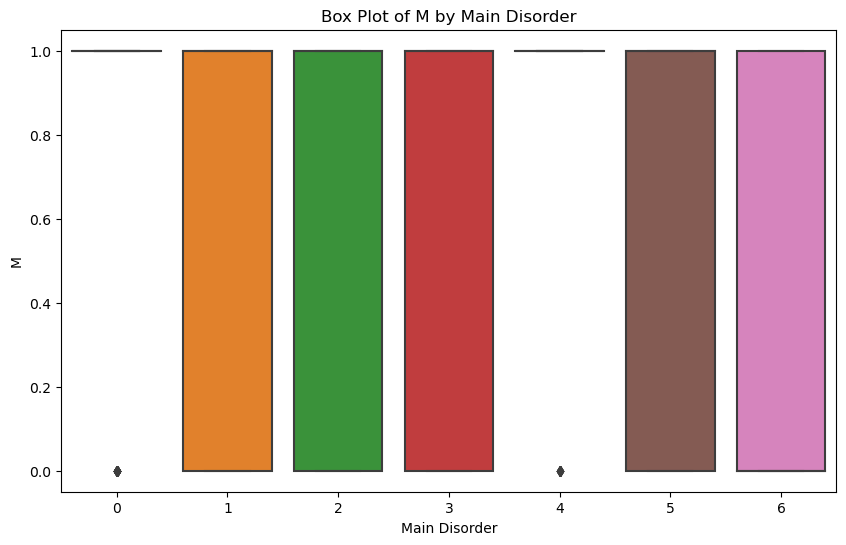

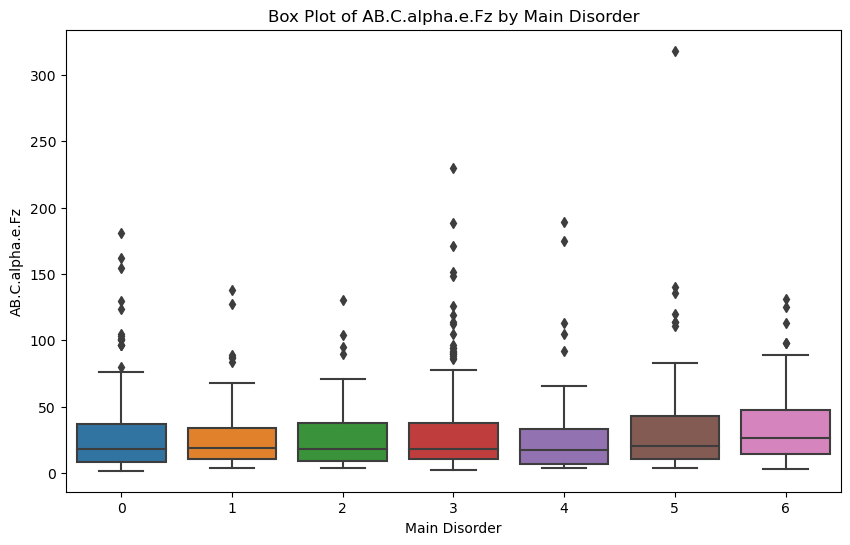

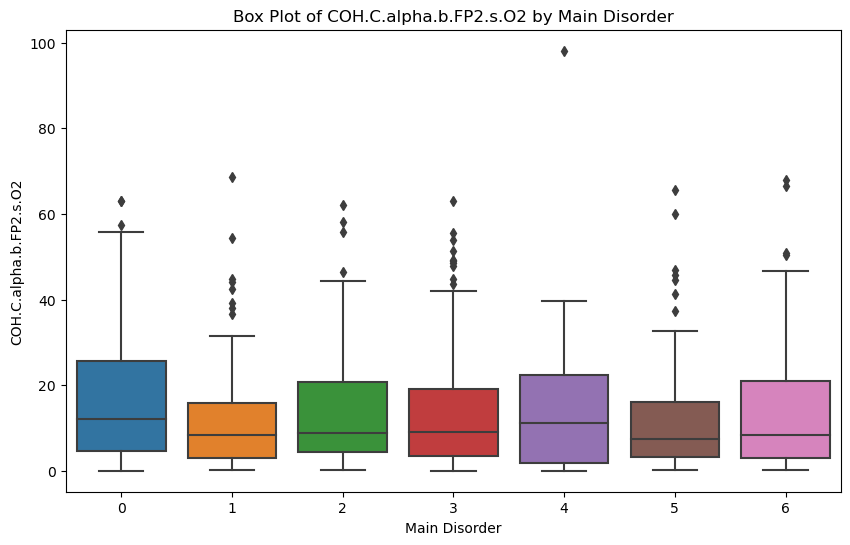

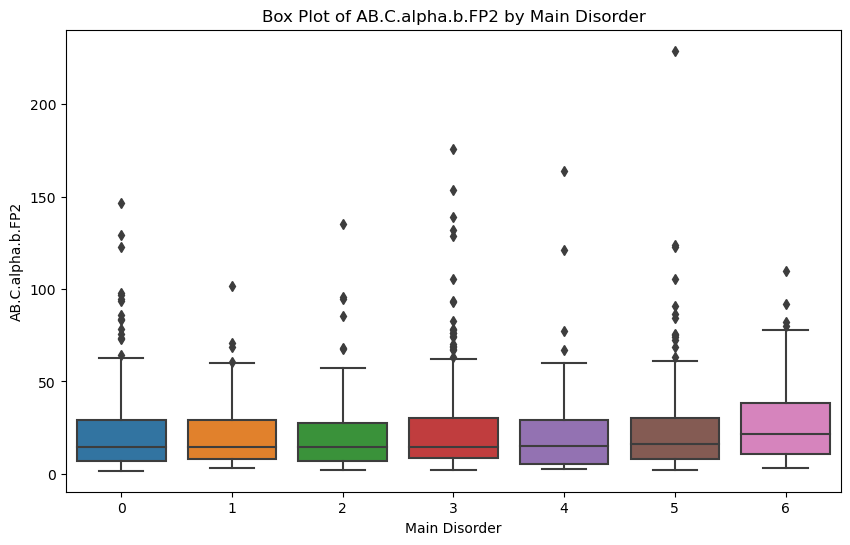

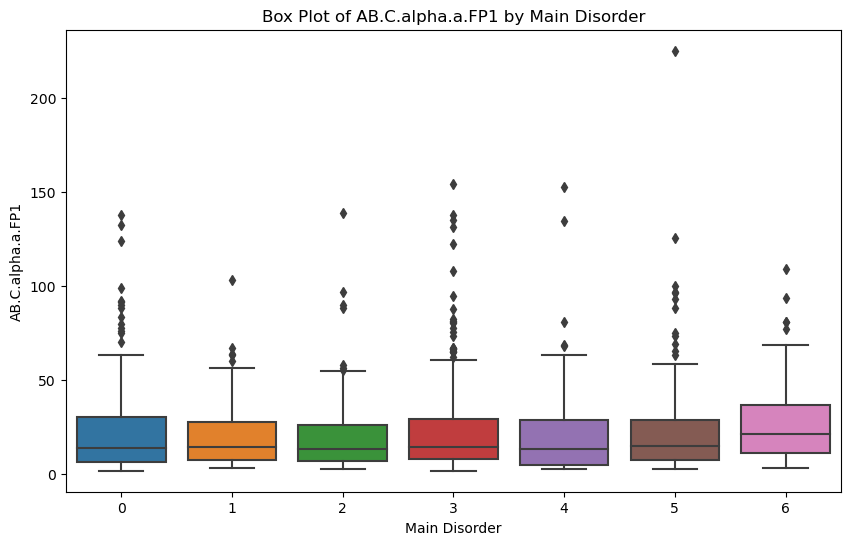

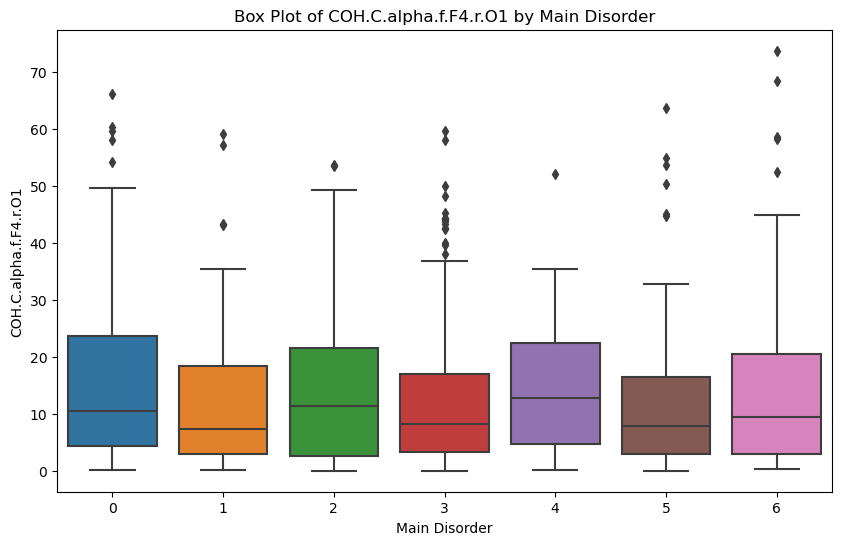

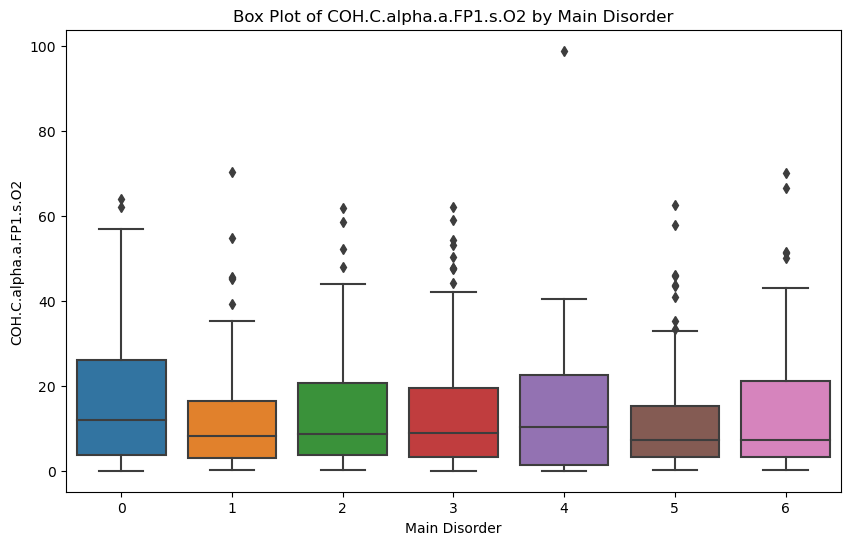

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix excluding the target variable
corr = df.drop(columns=['main.disorder']).corr()

# Set a threshold for high correlation
threshold = 0.8

# Find pairs of features with correlation higher than the threshold
high_corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

# Sort pairs by absolute correlation value in descending order
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)

# Select the top 5 pairs
top_5_corr_pairs = high_corr_pairs[:5]

# Print the top 5 pairs of features with high correlation
print("Top 5 pairs of features with high correlation:")
for pair in top_5_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

# Extract the unique features from the top 5 pairs
selected_features = list(set([feature for pair in top_5_corr_pairs for feature in pair[:2]]))

# Plot individual box plots for the selected features
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='main.disorder', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Main Disorder')
    plt.xlabel('Main Disorder')
    plt.ylabel(feature)
    plt.show()


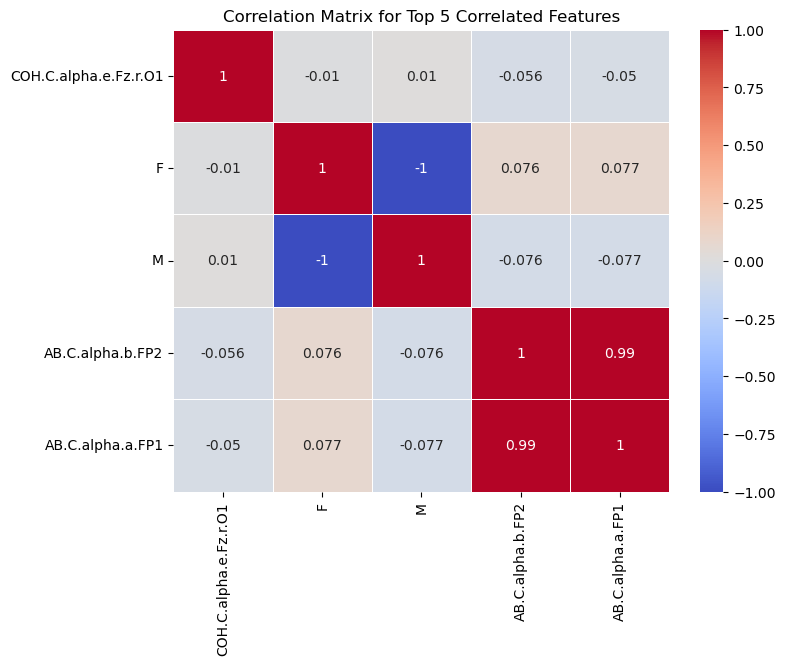

In [64]:
# Compute the correlation matrix excluding the target variable
corr = df.drop(columns=['main.disorder']).corr()

# Set a threshold for high correlation
threshold = 0.8

# Find pairs of features with correlation higher than the threshold
high_corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

# Sort pairs by absolute correlation value in descending order
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)

# Extract the top 5 unique features based on the highest correlations
top_features = set()
for pair in high_corr_pairs:
    top_features.add(pair[0])
    top_features.add(pair[1])
    if len(top_features) >= 5:
        break

top_features = list(top_features)[:5]

# Compute the correlation matrix for the selected features
selected_corr = df[top_features].corr()

# Plot the correlation matrix for the selected features
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix for Top 5 Correlated Features')
plt.show()


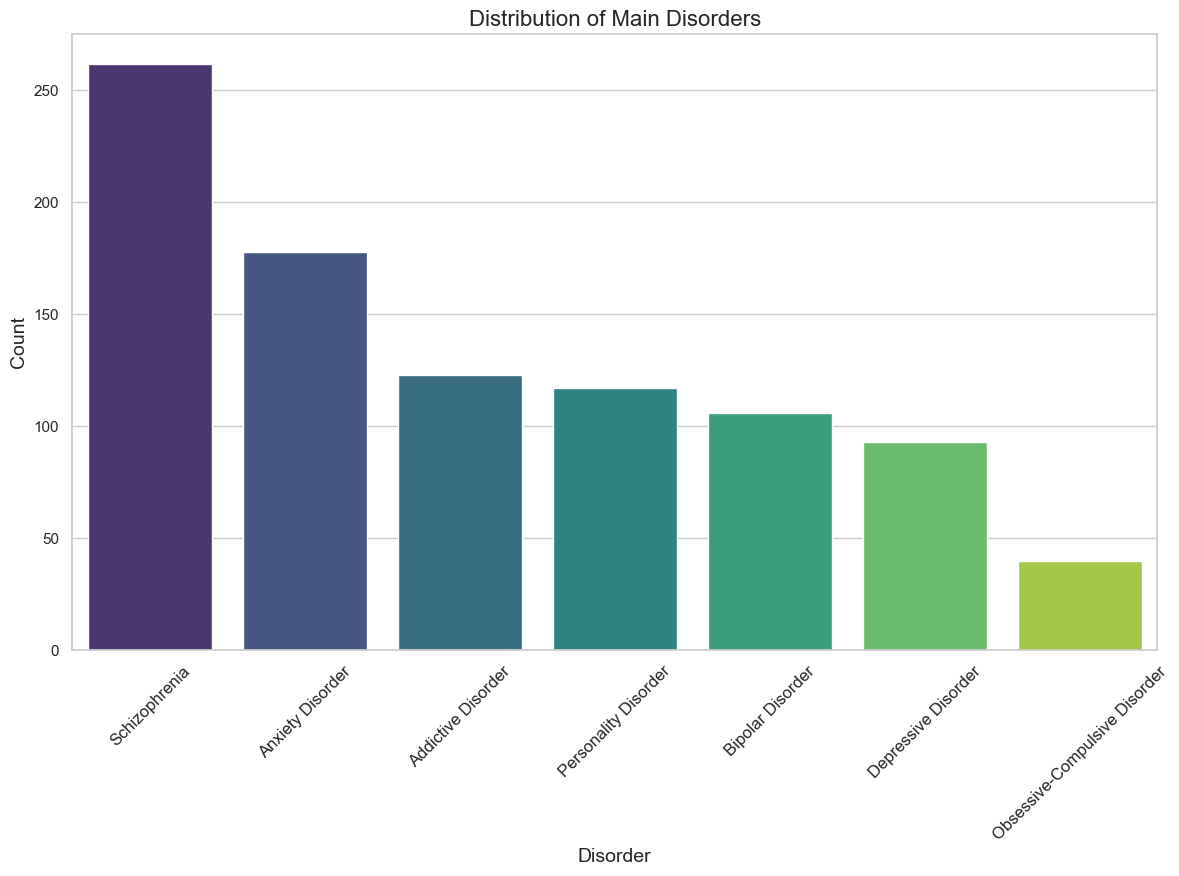

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map numerical values to disorder names
disorder_mapping = {
    0: 'Anxiety Disorder',
    1: 'Bipolar Disorder',
    2: 'Depressive Disorder',
    3: 'Schizophrenia',
    4: 'Obsessive-Compulsive Disorder',
    5: 'Personality Disorder',
    6: 'Addictive Disorder'
}

# Replace numerical values with disorder names in the dataframe
df['main.disorder'] = df['main.disorder'].map(disorder_mapping)

# Set the style for the plot
sns.set(style="whitegrid")

# Bar plot for the distribution of main disorders
plt.figure(figsize=(14, 8))
barplot = sns.countplot(data=df, x='main.disorder', order=df['main.disorder'].value_counts().index, palette="viridis")

# Rotate x-tick labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Set title and labels with larger font size
plt.title('Distribution of Main Disorders', fontsize=16)
plt.xlabel('Disorder', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()


# modeling

In [ ]:
Yes, you can decide not to use PCA if it does not improve your model's performance. PCA is a dimensionality reduction technique that aims to reduce the number of features while retaining as much variance as possible. However, it may not always lead to better results, especially if the original features are highly informative for your task.

Here are a few steps and considerations to make before deciding whether to use PCA:

Evaluate Model Performance without PCA:

If your models perform well without PCA, you might not need it. High-dimensional datasets can sometimes be handled effectively by certain algorithms, especially ensemble methods like Random Forest and Gradient Boosting.


In [45]:


# Step 6: Separate features and target
X = df.drop(columns=['main.disorder'])
y = df['main.disorder']

# Step 7: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Select top k features
k = 50  # You can adjust this number
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_scaled, y)

# Step 9: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    results[name] = {
        "Cross-validation scores": cv_scores,
        "Mean cross-validation score": cv_scores.mean(),
        "Test accuracy": test_accuracy,
        "Classification report": class_report
    }

# Print the results
for name, result in results.items():
    print(f"{name} Results:")
    print("Cross-validation scores:", result["Cross-validation scores"])
    print("Mean cross-validation score:", result["Mean cross-validation score"])
    print("Test accuracy:", result["Test accuracy"])
    print("Classification report:\n", result["Classification report"])
    print("\n")


KNN Results:
Cross-validation scores: [0.40540541 0.45945946 0.28378378 0.37837838 0.43243243 0.36986301
 0.46575342 0.39726027 0.28767123 0.43835616]
Mean cross-validation score: 0.39183635690485
Test accuracy: 0.42934782608695654
Classification report:
               precision    recall  f1-score   support

           0       0.62      0.74      0.67        39
           1       0.33      0.50      0.40        18
           2       0.26      0.33      0.29        15
           3       0.39      0.44      0.41        55
           4       0.50      0.09      0.15        11
           5       0.38      0.27      0.32        22
           6       0.42      0.21      0.28        24

    accuracy                           0.43       184
   macro avg       0.41      0.37      0.36       184
weighted avg       0.43      0.43      0.41       184



Random Forest Results:
Cross-validation scores: [0.85135135 0.83783784 0.85135135 0.85135135 0.86486486 0.89041096
 0.8630137  0.87671233 0.86301

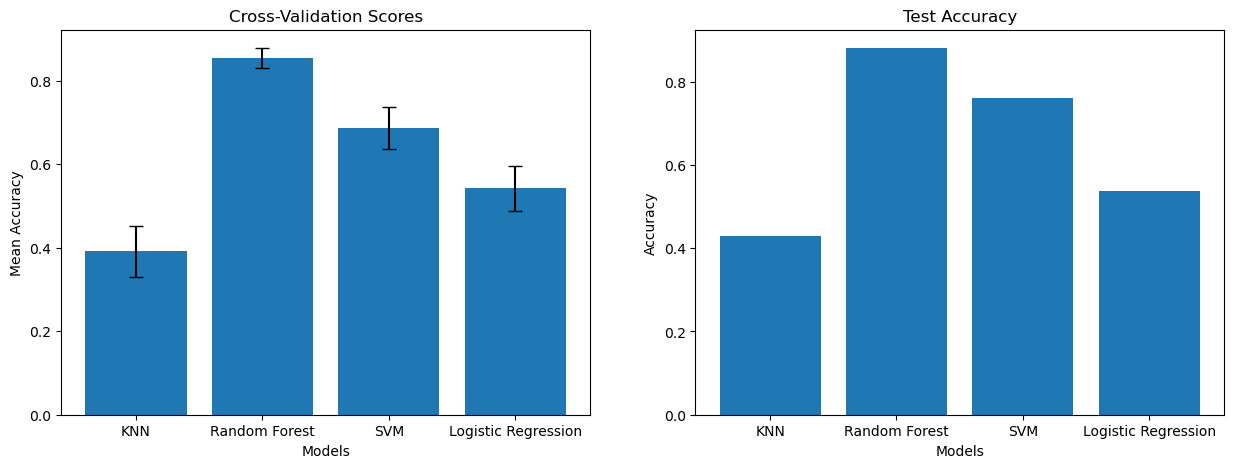

In [51]:
# Step 9: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        "Cross-validation scores": cv_scores,
        "Mean cross-validation score": cv_scores.mean(),
        "Test accuracy": test_accuracy,
        "Classification report": class_report,
        "Confusion matrix": conf_matrix
    }

# Plotting cross-validation scores and test accuracy
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Cross-validation scores
cv_means = [result["Mean cross-validation score"] for result in results.values()]
cv_std = [result["Cross-validation scores"].std() for result in results.values()]
model_names = list(results.keys())

ax[0].bar(model_names, cv_means, yerr=cv_std, capsize=5)
ax[0].set_title('Cross-Validation Scores')
ax[0].set_ylabel('Mean Accuracy')
ax[0].set_xlabel('Models')

# Test accuracy
test_accuracies = [result["Test accuracy"] for result in results.values()]

ax[1].bar(model_names, test_accuracies)
ax[1].set_title('Test Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Models')

plt.show()

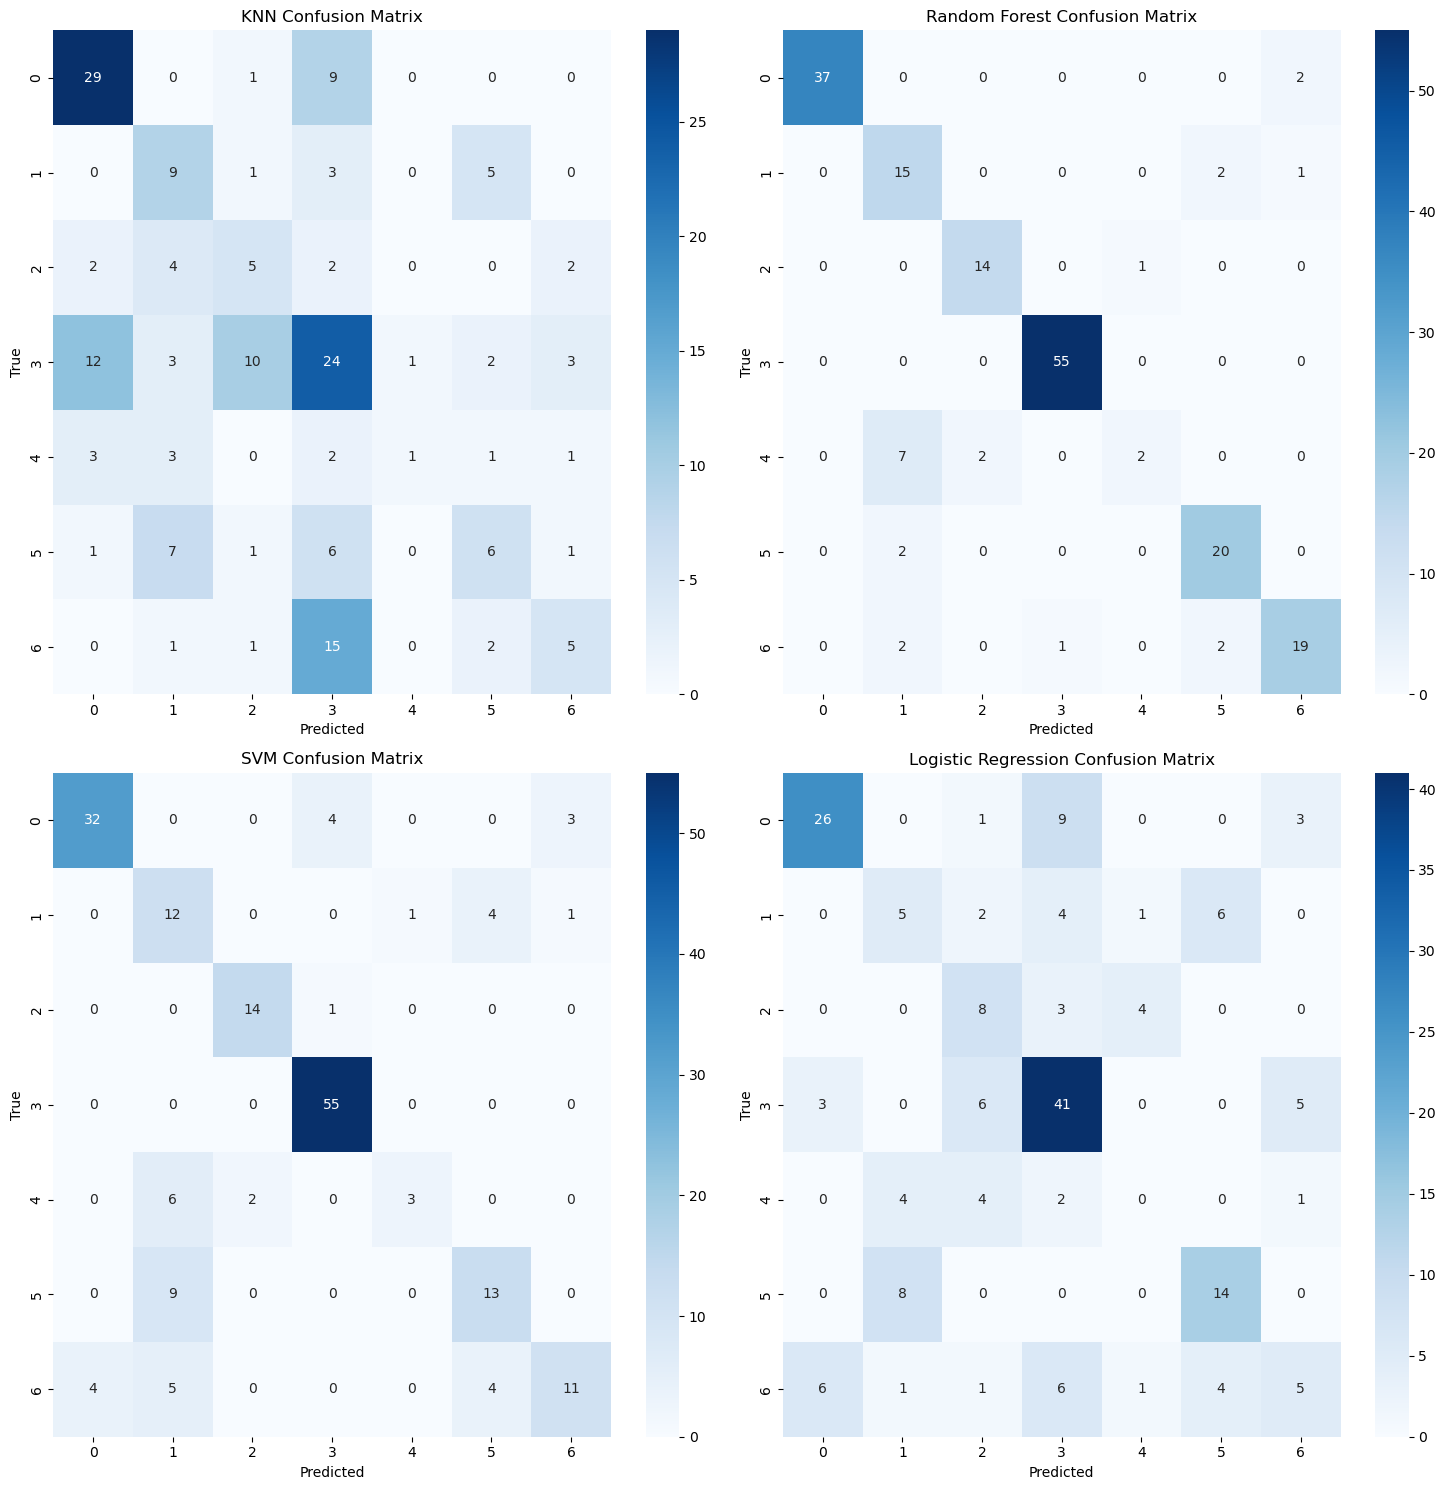

In [50]:
# Plotting confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    sns.heatmap(result["Confusion matrix"], annot=True, fmt="d", ax=axes[idx], cmap="Blues")
    axes[idx].set_title(f'{name} Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('True')

plt.tight_layout()
plt.show()

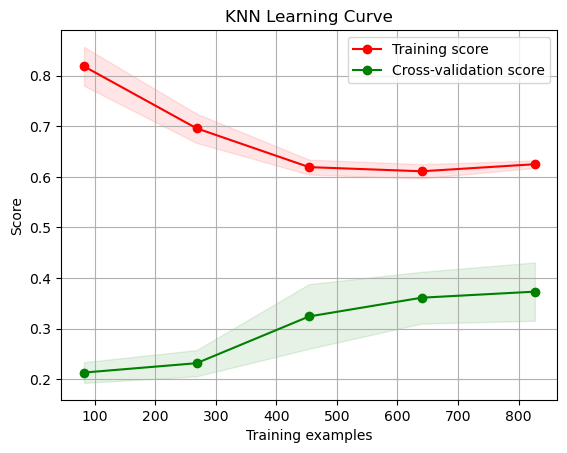

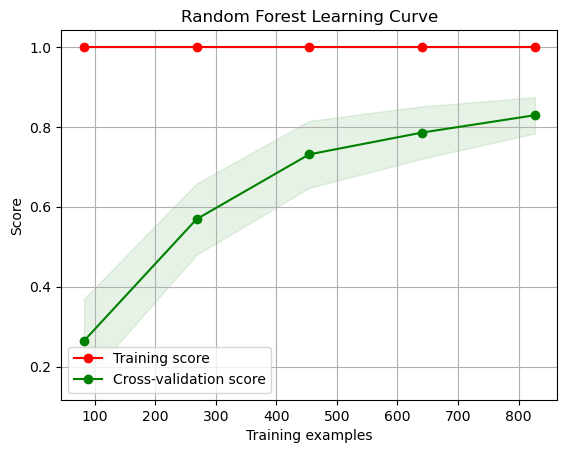

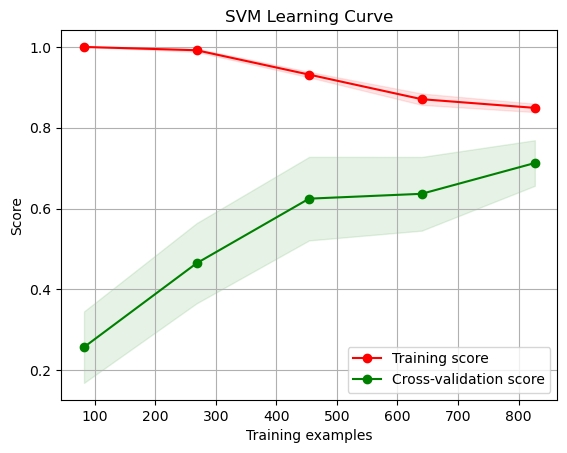

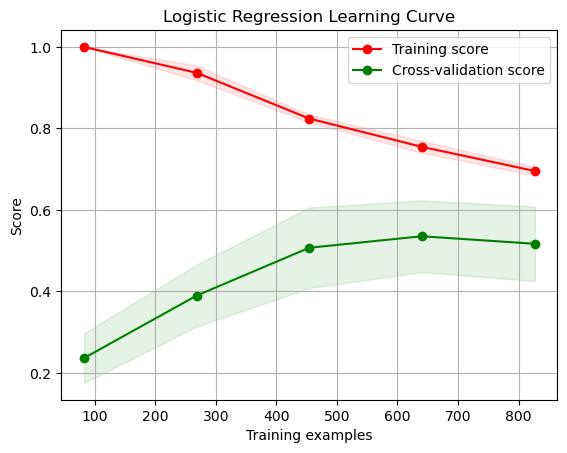

In [53]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

for name, model in models.items():
    plot_learning_curve(model, f'{name} Learning Curve', X_selected, y, cv=10, n_jobs=-1)
    plt.show()


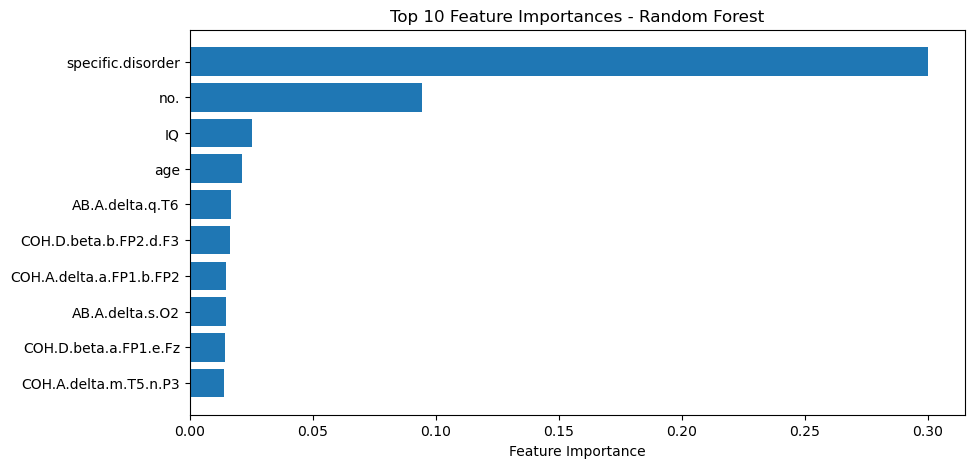

In [54]:
for name, model in models.items():
    model.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        "model": model,  # Ensure the model instance is stored
        "Cross-validation scores": cv_scores,
        "Mean cross-validation score": cv_scores.mean(),
        "Test accuracy": test_accuracy,
        "Classification report": class_report,
        "Confusion matrix": conf_matrix
    }
rf_model = results['Random Forest']['model']

results[name] = {
    "model": model,  # Store the trained model instance
    "Cross-validation scores": cv_scores,
    "Mean cross-validation score": cv_scores.mean(),
    "Test accuracy": test_accuracy,
    "Classification report": class_report,
    "Confusion matrix": conf_matrix
}

# Plotting feature importance for Random Forest
rf_model = results['Random Forest']['model']  # Retrieve the model instance
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[-10:]  # Top 10 features

# Ensure the feature names correspond to the selected features
selected_feature_names = np.array(df.drop(columns=['main.disorder']).columns)[selector.get_support()]

plt.figure(figsize=(10, 5))
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), selected_feature_names[indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()


C:\Users\bouad\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


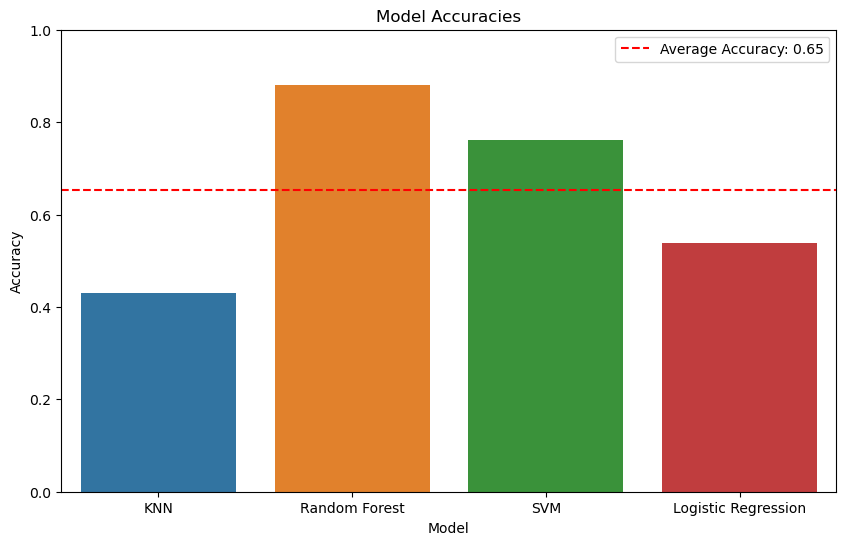

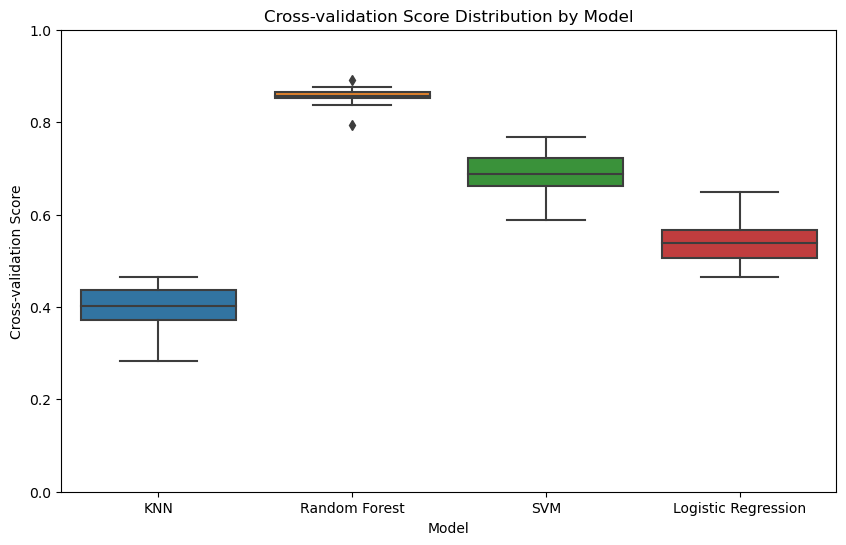

In [69]:
# Encode 'main.disorder' as numerical values
label_encoder = LabelEncoder()
df['main.disorder'] = label_encoder.fit_transform(df['main.disorder'])

# Separate features and target
X = df.drop(columns=['main.disorder'])
y = df['main.disorder']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select top k features
k = 50  # You can adjust this number
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_scaled, y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    results[name] = {
        "Cross-validation scores": cv_scores,
        "Mean cross-validation score": cv_scores.mean(),
        "Test accuracy": test_accuracy,
        "Classification report": class_report
    }

# Extract the test accuracies for bar plot
test_accuracies = {name: result["Test accuracy"] for name, result in results.items()}

# Calculate the average test accuracy
average_accuracy = sum(test_accuracies.values()) / len(test_accuracies)

# Bar plot with average line
plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()))
plt.axhline(average_accuracy, color='red', linestyle='--', label=f'Average Accuracy: {average_accuracy:.2f}')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 1)
plt.legend()
plt.show()

# Box plot for cross-validation scores
cv_scores_df = pd.DataFrame({
    'Model': [name for name, result in results.items() for _ in result["Cross-validation scores"]],
    'Cross-validation Score': [score for result in results.values() for score in result["Cross-validation scores"]]
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Cross-validation Score', data=cv_scores_df)
plt.xlabel('Model')
plt.ylabel('Cross-validation Score')
plt.title('Cross-validation Score Distribution by Model')
plt.ylim(0, 1)
plt.show()
